In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   

In [3]:
# 데이터 차원축소
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
breast = load_breast_cancer()
breast_std = StandardScaler().fit_transform(breast.data)

In [4]:
from sklearn.decomposition import PCA
pca10 = PCA(n_components=10)      # 10차원
breast_pca10 = pca10.fit_transform(breast_std)
breast_pca10[:5]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.6337309 , -1.19511013,
         1.41142446,  2.15936986, -0.39840842, -0.15711935, -0.8774026 ],
       [ 2.3878018 , -3.76817174, -0.52929269,  1.11826387,  0.62177499,
         0.02865632,  0.0133583 ,  0.24098976, -0.71190261,  1.1069953 ],
       [ 5.73389628, -1.0751738 , -0.55174759,  0.91208269, -0.17708588,
         0.54145225, -0.66816666,  0.09737056,  0.02405632,  0.4542916 ],
       [ 7.1229532 , 10.27558912, -3.23278955,  0.15254707, -2.96087836,
         3.053422  ,  1.42991059,  1.0595599 , -1.40545522, -1.11694539],
       [ 3.93530207, -1.94807157,  1.38976673,  2.94063935,  0.5467474 ,
        -1.22649465, -0.93621244,  0.6363764 , -0.26380415,  0.37770333]])

In [5]:
pca5 = PCA(n_components=5)      # 5차원
breast_pca5 = pca5.fit_transform(breast_std)
breast_pca5[:5]

array([[ 9.19283682,  1.94858312, -1.12316559,  3.63373287, -1.19509746],
       [ 2.3878018 , -3.76817177, -0.529293  ,  1.11826284,  0.62176817],
       [ 5.73389628, -1.07517381, -0.55174785,  0.91208192, -0.17708954],
       [ 7.1229532 , 10.27558913, -3.23278956,  0.15254724, -2.96087671],
       [ 3.93530208, -1.94807159,  1.38976657,  2.94063836,  0.54674174]])

In [6]:
pca = PCA(n_components=2)      # 2차원
breast_pca = pca.fit_transform(breast_std)
breast_pca[:5]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

In [7]:
# 분류 정확도- 원본 데이터
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    breast.data, breast.target, stratify=breast.target, random_state=2021
)
rfc =RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9790209790209791

In [8]:
# 분류 정확도- pca data (2차원)  
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    breast_pca, breast.target, stratify=breast.target, random_state=2021
)
rfc.fit(X_train2, y_train2)
rfc.score(X_test2,y_test2)

0.9440559440559441

In [9]:
# 분류 정확도- pca data (5차원)  
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    breast_pca5, breast.target, stratify=breast.target, random_state=2021
)
rfc.fit(X_train5, y_train5)
rfc.score(X_test5,y_test5)

0.965034965034965

In [10]:
# 분류 정확도- pca data (10차원)  
X_train10, X_test10, y_train10, y_test10 = train_test_split(
    breast_pca10, breast.target, stratify=breast.target, random_state=2021
)
rfc.fit(X_train10, y_train10)
rfc.score(X_test10,y_test10)

0.972027972027972

In [11]:
# 2차원 시각화
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2021)

In [12]:
kmeans.fit(breast_std)

KMeans(n_clusters=2, random_state=2021)

In [13]:
df = pd.DataFrame(breast_pca, columns=['PC1','PC2'])
df['target'] = breast.target
df['cluster'] = kmeans.labels_
df.head()

,PC1,PC2,target,cluster
0,9.192837,1.948583,0,0
1,2.387802,-3.768172,0,0
2,5.733896,-1.075174,0,0
3,7.122953,10.275589,0,0
4,3.935302,-1.948072,0,0


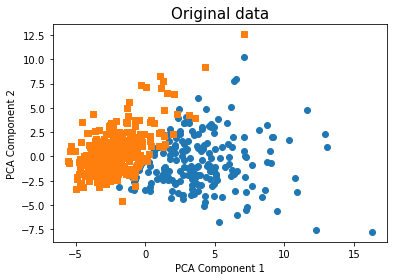

In [14]:
markers = ['o', 's']      

for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.title('Original data', fontsize=15)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

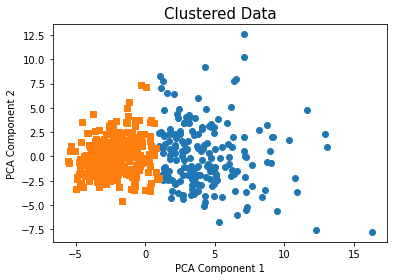

In [15]:
for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustered Data', fontsize=15)
plt.show()

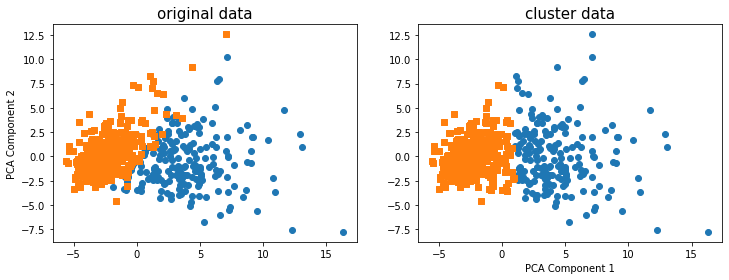

In [16]:
# 군집화해서 시각화
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker)
    if k == 0:          
        ax.set_title('original data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
    else:
        ax.set_title('cluster data', fontsize=15)
        ax.set_xlabel('PCA Component 1')
plt.show()    

In [17]:
# 평가
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(breast_std, df.cluster).mean()
score_samples , silhouette_score(breast_std, df.cluster)

(0.3433822406907781, 0.3433822406907781)

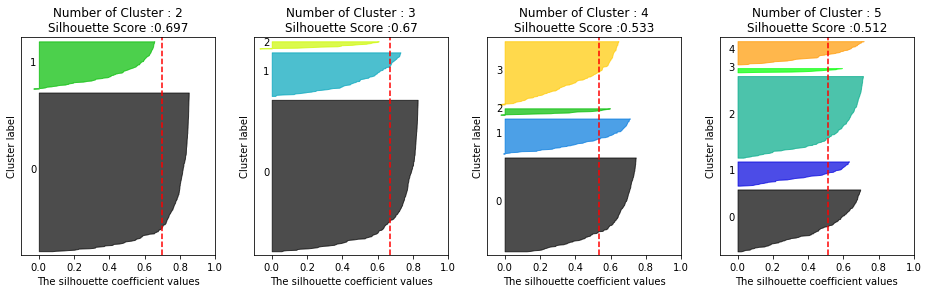

In [18]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], breast.data)